In [1]:
# importing required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import pyvista as pv
import vtk
import os
from vtk import vtkStructuredPoints
from skimage import io, transform
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors

In [2]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Professional/FinalProfessionalPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
1,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.000300,3177.0,8848.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
2,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,2.000733,2665.0,13301.0,1.0,2.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
3,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.932467,NaN,NaN,NaN,NaN,...,NaN,NaN,False,SkillLevelUp,1.0,NaN,NaN,NaN,NaN,TOP
4,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,3.001000,3352.0,13461.0,3.0,14.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392066,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.473867,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Locket of the Iron Solari,BOTTOM
392067,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.488683,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392068,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.491417,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392069,NA1_4573614609,Red,anonymous 97,na1,Kaisa,26.337567,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Null-Magic Mantle,BOTTOM


In [3]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]
jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5915,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,5.672050,8286.0,7654.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5938,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,17.020000,10048.0,8002.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5946,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,21.701117,6100.0,11267.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5951,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,23.496983,9475.0,8919.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5958,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,27.062767,11804.0,13243.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275711,KR_6375903925,Red,anonymous 48,kr,Elise,26.279650,1722.0,9788.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275716,KR_6375903925,Red,anonymous 48,kr,Elise,29.629633,3384.0,11610.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275722,KR_6375903925,Red,anonymous 48,kr,Elise,32.611683,6544.0,14078.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275750,KR_6376019501,Red,anonymous 49,kr,Gragas,12.166683,5575.0,8675.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [4]:
print("This dataset contains {} matches in which the jungler died at least once".format(len(np.unique(jungler_deaths_df["gameId"]))))

This dataset contains 805 matches in which the jungler died at least once


In [5]:
print("{} players died a total of {} times".format(len(np.unique(jungler_deaths_df["summoner"])), jungler_deaths_df.shape[0]))

20 players died a total of 4255 times


In [6]:
print("This Dataset contains an average of {} deaths per game".format((jungler_deaths_df.shape[0]/len(np.unique(jungler_deaths_df["gameId"])))))

This Dataset contains an average of 5.285714285714286 deaths per game


In [7]:
blueSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
blueSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6199,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,20.334733,11330.0,10690.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6474,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,3.296667,8030.0,5198.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6482,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,7.523067,6387.0,9619.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6489,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,11.265733,4626.0,9854.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6492,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,13.005150,13593.0,3353.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275292,NA1_4584642620,Blue,anonymous 37,na1,Sylas,14.535800,6292.0,10252.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275301,NA1_4584642620,Blue,anonymous 37,na1,Sylas,17.230867,13350.0,7182.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275359,NA1_4584524732,Blue,anonymous 41,na1,Poppy,6.853167,12331.0,4912.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275380,NA1_4584524732,Blue,anonymous 41,na1,Poppy,17.374817,6006.0,6468.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [8]:
print("Blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSide_jungler_deaths_df["gameId"]))))

Blue side contains 359 matches in which the jungler died at least once


In [9]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_jungler_deaths_df["summoner"])), blueSide_jungler_deaths_df.shape[0]))

20 players died a total of 1896 times on the blue side


In [10]:
redSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
redSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5915,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,5.672050,8286.0,7654.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5938,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,17.020000,10048.0,8002.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5946,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,21.701117,6100.0,11267.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5951,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,23.496983,9475.0,8919.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5958,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,27.062767,11804.0,13243.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275711,KR_6375903925,Red,anonymous 48,kr,Elise,26.279650,1722.0,9788.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275716,KR_6375903925,Red,anonymous 48,kr,Elise,29.629633,3384.0,11610.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275722,KR_6375903925,Red,anonymous 48,kr,Elise,32.611683,6544.0,14078.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275750,KR_6376019501,Red,anonymous 49,kr,Gragas,12.166683,5575.0,8675.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [11]:
print("Red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSide_jungler_deaths_df["gameId"]))))

Red side contains 462 matches in which the jungler died at least once


In [12]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_jungler_deaths_df["summoner"])), redSide_jungler_deaths_df.shape[0]))

20 players died a total of 2359 times on the red side


function to visualize the results

In [13]:
def visualizeResults(df, data_scaled, model, team, details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Riot Games API/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    plt.xlabel('X')
    plt.ylabel('Y')


    # Get the unique cluster labels
    unique_labels = np.unique(df['cluster'])

    # Normalize the cluster labels to range [0, 1]
    norm = mcolors.Normalize(vmin=0, vmax=len(unique_labels)-1)

    # Create a scalar mappable using the colormap and normalized values
    sm = plt.cm.ScalarMappable(cmap="plasma", norm=norm)
    sm.set_array([])

    # Get the face colors of the PathCollection object by mapping the cluster labels to colors using the scalar mappable
    face_colors = sm.to_rgba(unique_labels)

    colors = []
    # Iterate over the clusters and get the corresponding color code
    for i, label in enumerate(unique_labels):
        colors.append(mcolors.to_hex(face_colors[i]))

    if(details == "None"):
        title = "Clustering of Jungle Player Deaths " + team + "\nK-Means: n_clusters - " + str(model.get_params()["n_clusters"]) 
    else:
        title = "Clustering of Jungle Player Deaths when they " + details + " " + team + "\nK-Means: n_clusters - " + str(model.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(*scatter.legend_elements(), frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(model, data_scaled, colors="plasma", title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    return colors

function to view the average values in each cluster

In [14]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the standard deviation in each cluster

In [15]:
def clusterStandardDeviation(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Standard deviation for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.std(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.std(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.std(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the max and min values in each cluster

In [16]:
def clusterMinMaxValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "max coordinate_x": [],
    "min coordinate_x": [],
    "max coordinate_y": [],
    "min coordinate_y": [],
    "max timestamp": [],
    "min timestamp": []}

    print("Max and Min values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["max coordinate_x"].append(np.amax(temporary_df["coordinate_x"]))
        D["min coordinate_x"].append(np.amin(temporary_df["coordinate_x"]))
        D["max coordinate_y"].append(np.amax(temporary_df["coordinate_y"]))
        D["min coordinate_y"].append(np.amin(temporary_df["coordinate_y"]))
        D["max timestamp"].append(np.amax(temporary_df["timestamp"]))
        D["min timestamp"].append(np.amin(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

Function to view the number of deaths in each stage of the game (early, mid, and late game) for each cluster:

In [17]:
def stagesPerCluster(df, colors):
    c = 0

    for cluster in np.unique(df["cluster"]):
        temporary_df = df[df["cluster"] == cluster].copy()
        temporary_df = temporary_df.sort_values(by=["timestamp"])
        stage = []
        for time in temporary_df["timestamp"]:
            if(time < 15):
                stage.append("early game")
            elif((time >= 15) and (time < 25)):
                stage.append("mid game")
            else:
                stage.append("late game")
        
        stage = np.array(stage)
        temporary_df["stages"] = stage
        plt.figure(figsize=(14, 6))
        g = sns.countplot(x='stages', data=temporary_df, color=colors[c]);
        plt.title('Stages of game in cluster {}'.format(cluster));
        ax=g.axes
        c += 1

Function that returns a scatter plot of the timestamps in each cluster:

In [18]:

def scatterTimestamp(df):
    for cluster in np.unique(df["cluster"]):
        temporary_df = df[df["cluster"] == cluster]
        temporary_df = temporary_df.sort_values(by=["timestamp"])
        arr = np.arange(1, temporary_df.shape[0]+1, 1)
        temporary_df["death"] = arr 
        #print(temporary_df)
        
        fig, ax = plt.subplots()
        scatter = ax.scatter(temporary_df['death'], temporary_df['timestamp'])
        plt.xlabel('deaths')
        plt.ylabel('timestamp')

        title = "Timestamps of Jungle Player Deaths in cluster " + str(cluster) + "\n"
        plt.title(title)
        plt.grid(visible=None)
        plt.figure(figsize=(2000,6))
        plt.show()

---

### Clustering by Player - K-Means Model


| **Anonymous 26** |
**Anonymous 29** |
**Anonymous 31** |

---
##### Clustering Red Team Victory

In [20]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]

redSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True) & (jungler_deaths_df["summoner"] == "anonymous 26")]
redSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
7106,EUW1_6274142990,Red,anonymous 26,euw1,JarvanIV,3.757750,9958.0,5182.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7113,EUW1_6274142990,Red,anonymous 26,euw1,JarvanIV,7.021167,11599.0,1004.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7115,EUW1_6274142990,Red,anonymous 26,euw1,JarvanIV,7.845033,9370.0,7357.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7132,EUW1_6274142990,Red,anonymous 26,euw1,JarvanIV,14.585050,8296.0,8656.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7245,EUW1_6274046596,Red,anonymous 26,euw1,Poppy,5.088767,7805.0,6643.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265919,EUW1_6288956093,Red,anonymous 26,euw1,Maokai,15.838600,8588.0,9794.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
265924,EUW1_6288956093,Red,anonymous 26,euw1,Maokai,18.427283,8943.0,3737.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
265938,EUW1_6288926178,Red,anonymous 26,euw1,Poppy,2.966100,7057.0,6717.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
265969,EUW1_6288926178,Red,anonymous 26,euw1,Poppy,17.134850,6346.0,9176.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [21]:
print("{} played {} matches".format("Anonymous 26", len(np.unique(redSideVictory_df["gameId"]))))

Anonymous 26 played 26 matches


In [22]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 26 matches in which the jungler died at least once
1 players died a total of 100 times on the red side
Victory games on red side contains an average of 3.8461538461538463 deaths per game


In [23]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

,coordinate_x,coordinate_y,timestamp
7106,9958.0,5182.0,3.757750
7113,11599.0,1004.0,7.021167
7115,9370.0,7357.0,7.845033
7132,8296.0,8656.0,14.585050
7245,7805.0,6643.0,5.088767
...,...,...,...
265919,8588.0,9794.0,15.838600
265924,8943.0,3737.0,18.427283
265938,7057.0,6717.0,2.966100
265969,6346.0,9176.0,17.134850


Normalize Data:

In [24]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSideVictory_df)
data_scaled

array([[ 6.84849624e-01, -4.78622208e-01, -1.40503953e+00],
       [ 1.15847143e+00, -1.84323998e+00, -9.89159180e-01],
       [ 5.15142360e-01,  2.31775984e-01, -8.84168002e-01],
       [ 2.05166847e-01,  6.56055180e-01, -2.52398308e-02],
       [ 6.34555087e-02, -1.43059498e-03, -1.23541863e+00],
       [ 3.95365974e-01,  5.21161178e-01, -6.32902398e-01],
       [-4.04971175e-01, -5.33820964e-01,  7.54928242e-02],
       [-1.10775551e+00,  1.09993157e+00,  2.51678861e-01],
       [-1.51124319e+00, -1.97878722e+00,  1.03893004e+00],
       [ 1.59688186e+00, -9.40789308e-01, -1.39973390e+00],
       [-9.08320611e-01,  1.01207083e+00,  1.80662414e-01],
       [ 1.06957715e+00, -7.60168526e-01,  4.74409175e-01],
       [ 8.77069076e-01,  6.66833635e-01, -1.32939287e+00],
       [ 1.42255671e+00, -1.11912375e+00, -8.24971346e-01],
       [-3.48690704e-01, -5.46232519e-01,  4.59040261e-01],
       [-3.49267940e-01,  9.28782762e-01,  7.83448388e-01],
       [-2.03804571e-01, -6.07963672e-01

In [25]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.31490305689249726
Silhouette score for k=3: 0.3053241388895415
Silhouette score for k=4: 0.3077317583266388
Silhouette score for k=5: 0.31092386681988143
Silhouette score for k=6: 0.30283325316866283
Silhouette score for k=7: 0.3062958250055204
Silhouette score for k=8: 0.313993309349631
Silhouette score for k=9: 0.30562818067351016
Silhouette score for k=10: 0.2898772598350673
Silhouette score for k=11: 0.2984270273342878
Silhouette score for k=12: 0.28396847297636774
Silhouette score for k=13: 0.2985371812868379
Silhouette score for k=14: 0.2699356422795365
Silhouette score for k=15: 0.2980216413418298
Silhouette score for k=16: 0.25794107039433306
Silhouette score for k=17: 0.2969015176137031
Silhouette score for k=18: 0.2840885799400929
Silhouette score for k=19: 0.29551248716832484
Silhouette score for k=20: 0.26220007752369767
Silhouette score for k=25: 0.29057256172797014


K-Means with k = 2

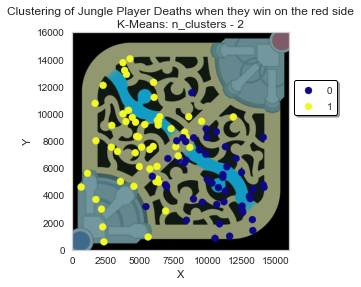

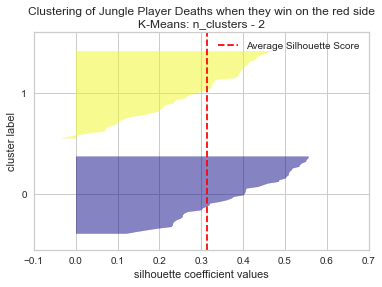

Silhouette score: 0.31490305689249726
1    53
0    47
Name: cluster, dtype: int64

Inertia: 193.62213874544148

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10378.957447,5255.085106,10.19017
1,1,5107.603774,7882.056604,18.85609


In [27]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [28]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2224.975362,2355.746662,5.756839
1,1,2280.451084,3085.713491,7.175985


In [29]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14129.0,5444.0,11560.0,843.0,22.524517,2.532983
1,1,11876.0,678.0,14056.0,589.0,33.095233,3.057433


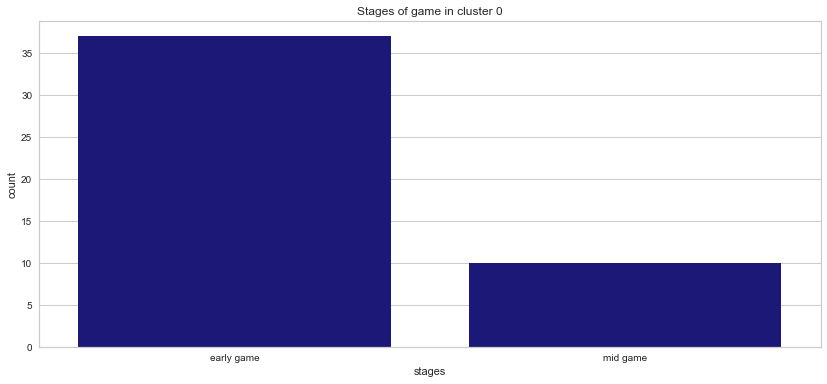

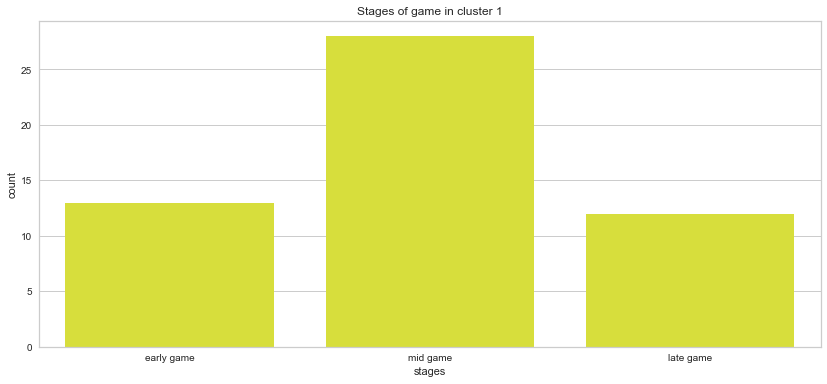

In [30]:
stagesPerCluster(redSideVictory_df, colors)

K-Means with k = 8

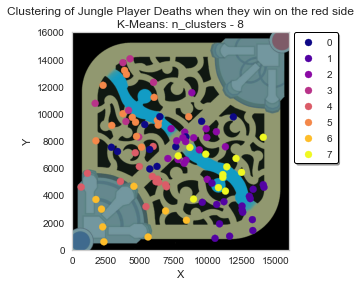

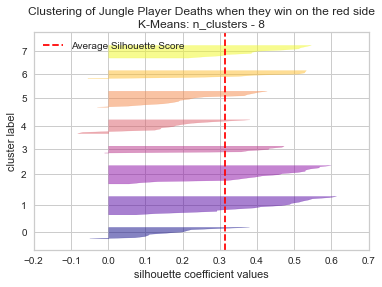

Silhouette score: 0.313993309349631
2    17
1    17
5    15
4    13
7    12
0    11
6     8
3     7
Name: cluster, dtype: int64

Inertia: 65.6715754331459

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,6655.000000,8035.272727,27.162567
1,1,12151.294118,3124.941176,8.957952
2,2,8831.411765,7877.352941,7.014245
3,3,4110.571429,11275.142857,7.540100
4,4,5001.846154,5333.230769,11.584458
5,5,4748.466667,9975.933333,19.166071
6,6,4250.500000,2452.875000,24.162104
7,7,10797.833333,5982.583333,18.652382


In [31]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [32]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2489.989558,1317.519301,3.373874
1,1,1362.666062,1246.178982,3.685676
2,2,1148.329275,1368.099753,3.228320
3,3,1205.662812,2019.024689,1.474361
4,4,1962.748224,1089.261017,5.439109
5,5,1728.596574,1624.658178,3.296259
6,6,2354.924468,1292.224965,2.192281
7,7,1675.915811,1313.715752,2.283569


In [33]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,11876.0,2898.0,9798.0,5950.0,33.095233,21.395367
1,1,14129.0,9588.0,4905.0,843.0,15.518433,3.661233
2,2,11290.0,7057.0,11560.0,5182.0,14.585050,2.532983
3,3,6002.0,1706.0,14056.0,8302.0,9.064067,4.760250
4,4,6958.0,678.0,7606.0,3179.0,18.385200,2.722133
5,5,8588.0,1764.0,13200.0,7551.0,26.488150,15.002900
6,6,8422.0,1761.0,4671.0,589.0,28.144350,19.984233
7,7,14076.0,7818.0,8278.0,3737.0,22.524517,13.936550


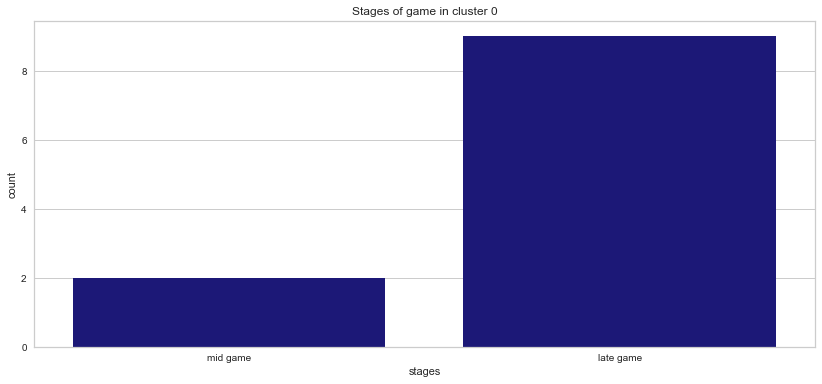

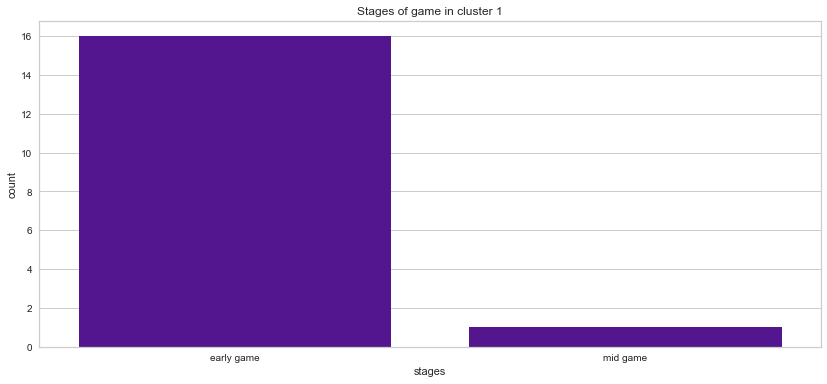

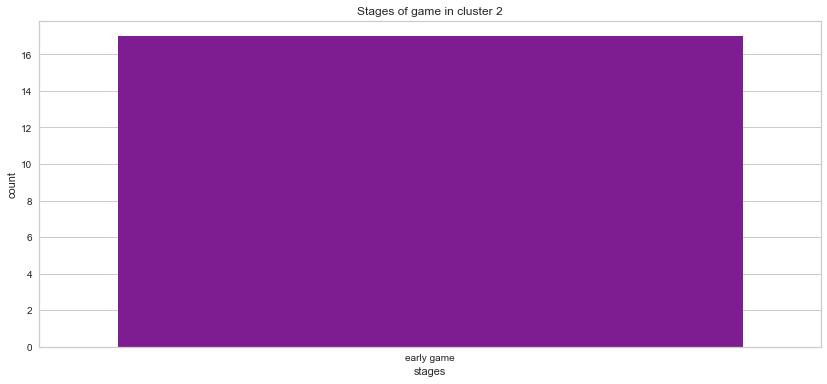

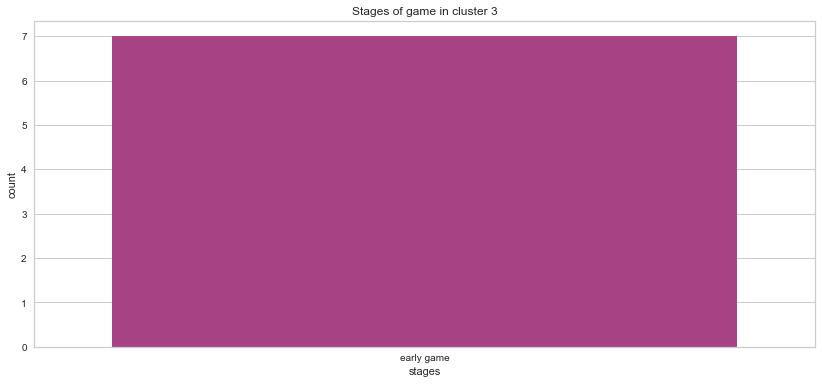

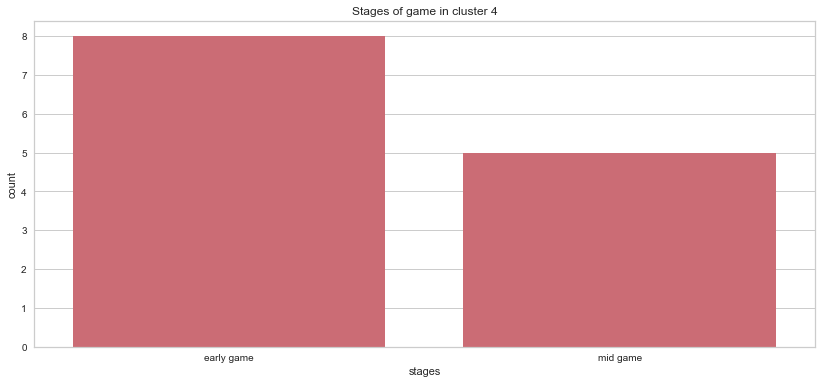

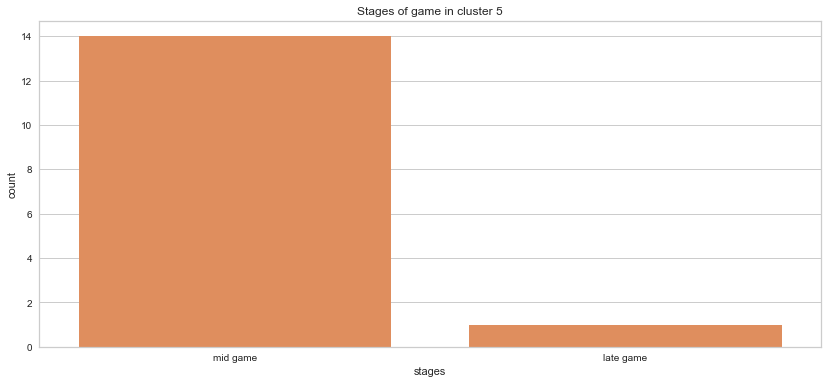

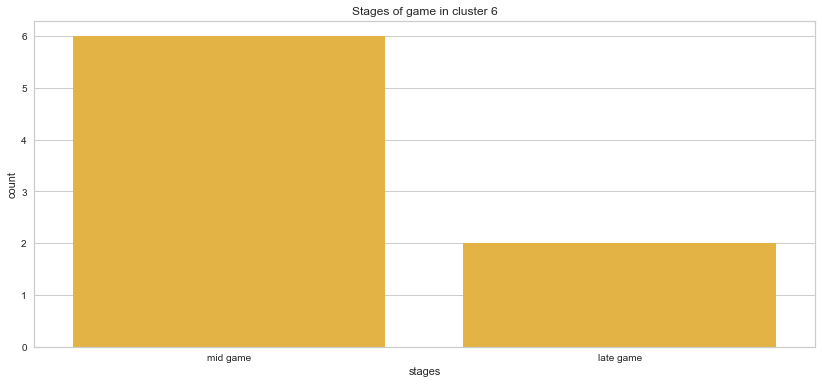

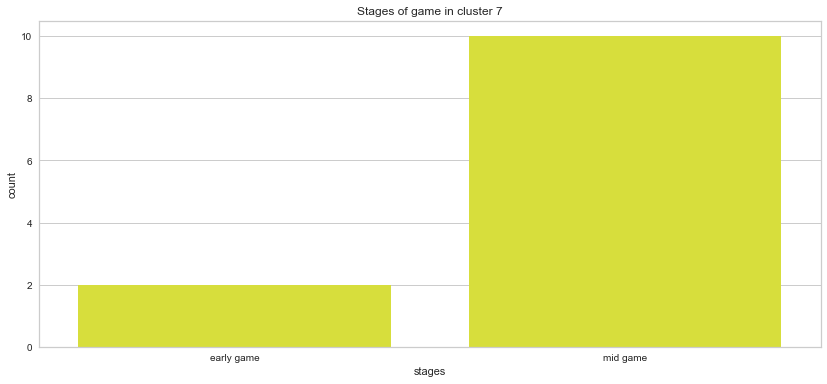

In [34]:
stagesPerCluster(redSideVictory_df, colors)

---
##### Clustering Red Team Defeat

In [35]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]

redSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False) & (jungler_deaths_df["summoner"] == "anonymous 26")]
redSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
7307,EUW1_6273985443,Red,anonymous 26,euw1,Vi,4.880117,10012.0,7242.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7325,EUW1_6273985443,Red,anonymous 26,euw1,Vi,14.009083,753.0,8377.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7329,EUW1_6273985443,Red,anonymous 26,euw1,Vi,16.499983,3957.0,13365.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7336,EUW1_6273985443,Red,anonymous 26,euw1,Vi,21.156017,9685.0,12030.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7340,EUW1_6273985443,Red,anonymous 26,euw1,Vi,22.823350,13891.0,3392.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266024,EUW1_6288888392,Red,anonymous 26,euw1,Vi,18.416383,3260.0,10334.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
266030,EUW1_6288888392,Red,anonymous 26,euw1,Vi,21.522700,6337.0,6792.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
266036,EUW1_6288888392,Red,anonymous 26,euw1,Vi,23.645000,4748.0,9978.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
266046,EUW1_6288888392,Red,anonymous 26,euw1,Vi,27.994450,6791.0,1000.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [36]:
print("{} played {} matches".format("Anonymous 26", len(np.unique(redSideDefeat_df["gameId"]))))

Anonymous 26 played 17 matches


In [37]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 17 matches in which the jungler died at least once
1 players died a total of 109 times on the red side
Defeat games on red side contains an average of 6.411764705882353 deaths per game


In [38]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

,coordinate_x,coordinate_y,timestamp
7307,10012.0,7242.0,4.880117
7325,753.0,8377.0,14.009083
7329,3957.0,13365.0,16.499983
7336,9685.0,12030.0,21.156017
7340,13891.0,3392.0,22.823350
...,...,...,...
266024,3260.0,10334.0,18.416383
266030,6337.0,6792.0,21.522700
266036,4748.0,9978.0,23.645000
266046,6791.0,1000.0,27.994450


Normalize Data:

In [39]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSideDefeat_df)
data_scaled

array([[ 3.89530932e-01, -2.28101628e-01, -1.33603790e+00],
       [-2.34053450e+00,  8.08968271e-02, -1.55816009e-01],
       [-1.39581805e+00,  1.43885656e+00,  1.66215477e-01],
       [ 2.93113242e-01,  1.07540904e+00,  7.68162297e-01],
       [ 1.53327473e+00, -1.27624617e+00,  9.83720461e-01],
       [ 7.23602013e-01,  1.58096862e+00,  1.18107124e+00],
       [-5.01226998e-01,  8.79664639e-01, -1.79351076e+00],
       [-2.09315089e+00,  9.36291669e-01, -1.37877245e+00],
       [-4.07463005e-01,  1.01850976e+00, -1.04941923e+00],
       [ 3.90120643e-01,  3.20744967e-01, -5.67587263e-01],
       [-1.38726724e+00,  1.58886374e+00, -3.67260813e-01],
       [ 4.63244763e-01,  8.32293951e-01, -6.64964110e-02],
       [ 3.78916141e-01,  1.54693795e+00,  3.10508440e-01],
       [ 8.63658292e-01,  9.06616928e-01,  5.08460389e-01],
       [ 1.39882070e+00,  1.66381862e-01,  6.63828612e-01],
       [ 1.37493742e+00, -1.64867778e+00, -1.36856770e+00],
       [ 1.25876442e+00, -2.40624913e-01

In [40]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.30736495916895834
Silhouette score for k=3: 0.3502174912895124
Silhouette score for k=4: 0.36689302244673233
Silhouette score for k=5: 0.31573243061364303
Silhouette score for k=6: 0.3278921380284997
Silhouette score for k=7: 0.33152926925980425
Silhouette score for k=8: 0.2991842912646762
Silhouette score for k=9: 0.2800517539937569
Silhouette score for k=10: 0.2827338644791336
Silhouette score for k=11: 0.29191592245606685
Silhouette score for k=12: 0.2896044518514973
Silhouette score for k=13: 0.2695790905466603
Silhouette score for k=14: 0.282530075620746
Silhouette score for k=15: 0.28556223155534494
Silhouette score for k=16: 0.26573621867318953
Silhouette score for k=17: 0.28694135388446984
Silhouette score for k=18: 0.28961478023400944
Silhouette score for k=19: 0.26908283732203303
Silhouette score for k=20: 0.28266523778573677
Silhouette score for k=25: 0.28161571899909316


K-Means with k = 4

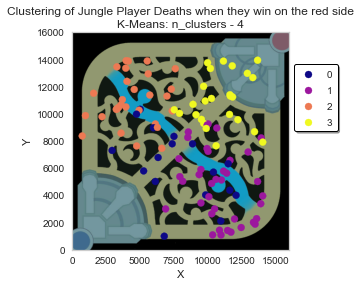

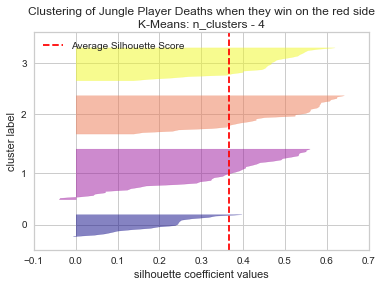

Silhouette score: 0.36689302244673233
1    38
2    29
3    25
0    17
Name: cluster, dtype: int64

Inertia: 114.75714951997352

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,7845.705882,6222.411765,26.346703
1,1,10850.552632,4766.236842,10.474885
2,2,4460.862069,10998.586207,10.530952
3,3,10889.840000,10993.880000,20.280920


In [41]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [42]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2709.763714,2527.965238,4.878046
1,1,1845.722932,2526.225241,5.146584
2,2,1812.614433,1844.536434,4.261117
3,3,1732.196817,1850.271230,3.718110


In [43]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,12074.0,2954.0,10338.0,1000.0,37.827767,19.818217
1,1,14034.0,6889.0,9258.0,1092.0,22.823350,3.492683
2,2,7603.0,753.0,13916.0,7466.0,18.416383,1.341583
3,3,14036.0,7528.0,13949.0,7651.0,28.674317,14.699967


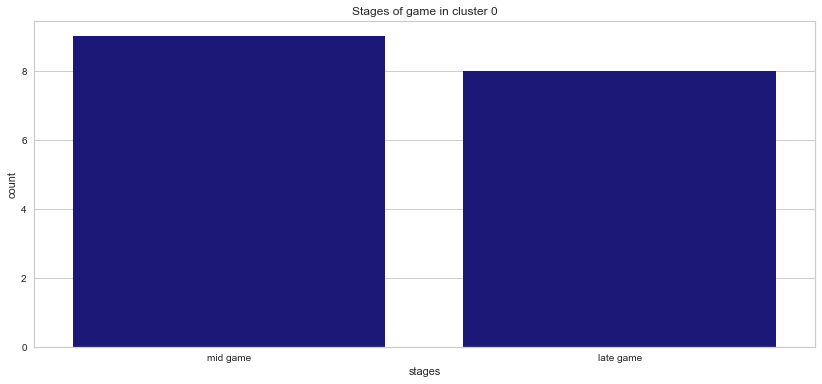

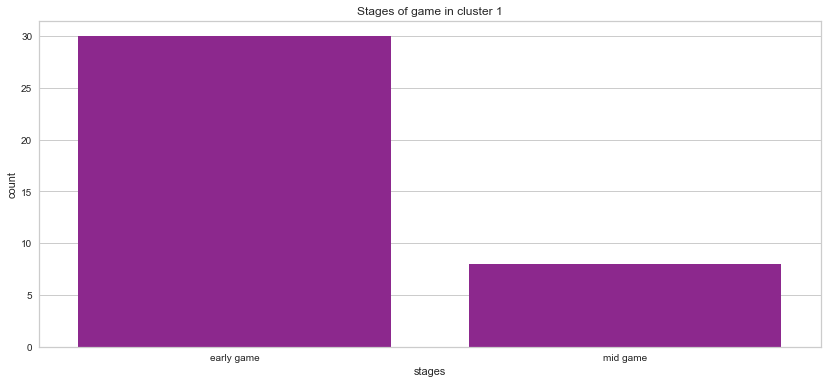

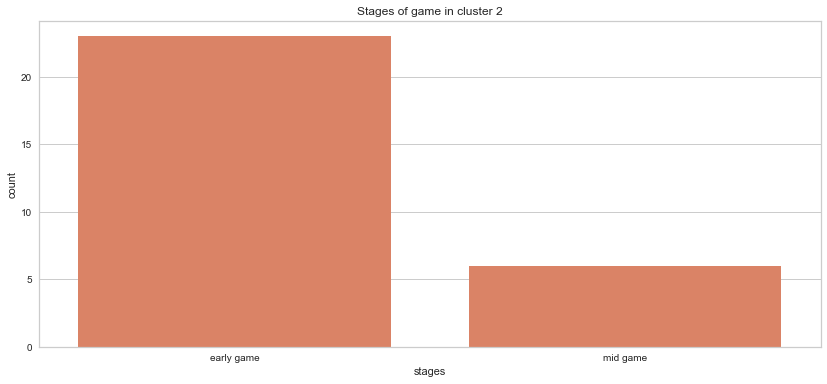

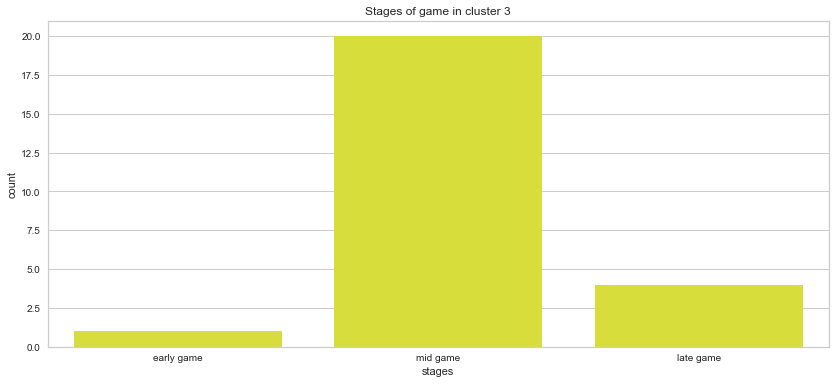

In [44]:
stagesPerCluster(redSideDefeat_df, colors)

K-Means with k = 3

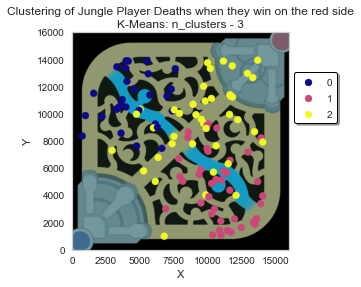

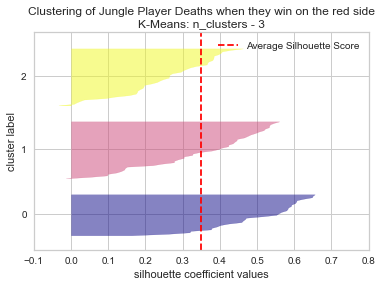

Silhouette score: 0.3502174912895124
1    40
2    40
0    29
Name: cluster, dtype: int64

Inertia: 145.99305876475788

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,4460.862069,10998.586207,10.530952
1,1,10872.100000,4690.500000,11.113345
2,2,9576.500000,9353.125000,22.710720


In [45]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [46]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1812.614433,1844.536434,4.261117
1,1,1802.953546,2497.165673,5.744326
2,2,2682.608963,2962.803986,5.287560


In [47]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,7603.0,753.0,13916.0,7466.0,18.416383,1.341583
1,1,14034.0,6889.0,9258.0,1092.0,24.580700,3.492683
2,2,14036.0,2954.0,13949.0,1000.0,37.827767,14.699967


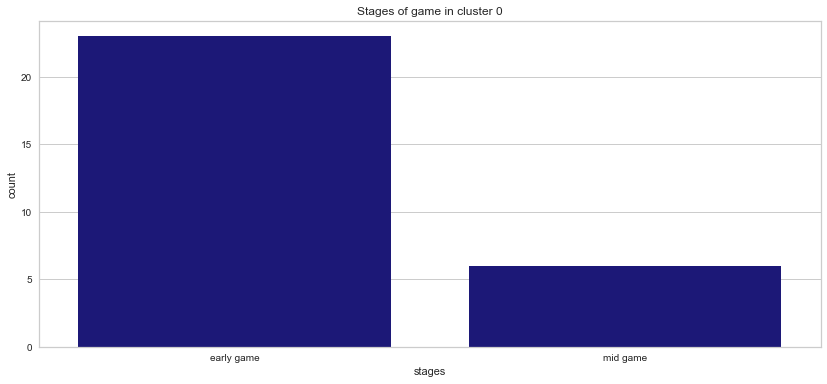

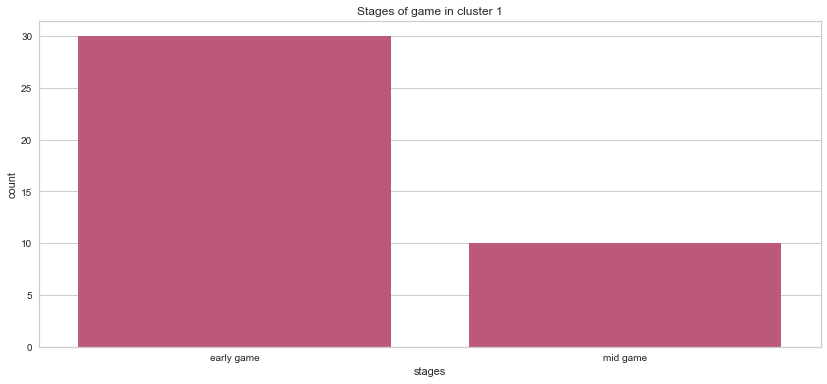

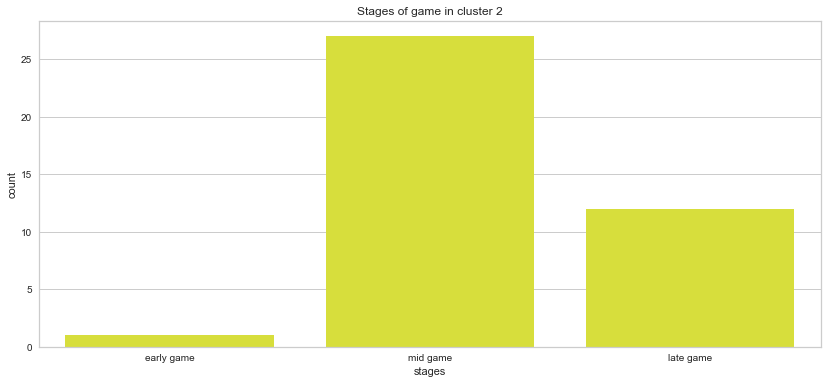

In [48]:
stagesPerCluster(redSideDefeat_df, colors)

---
##### Clustering Blue Team Victory

In [63]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]

blueSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True) & (jungler_deaths_df["summoner"] == "anonymous 26")]
blueSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
7176,EUW1_6274092862,Blue,anonymous 26,euw1,Maokai,6.716617,11645.0,4565.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7193,EUW1_6274092862,Blue,anonymous 26,euw1,Maokai,14.921200,9965.0,4349.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7212,EUW1_6274092862,Blue,anonymous 26,euw1,Maokai,22.328617,11123.0,10651.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7222,EUW1_6274092862,Blue,anonymous 26,euw1,Maokai,25.689900,13565.0,8599.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7822,EUW1_6271109292,Blue,anonymous 26,euw1,MonkeyKing,6.889283,10112.0,4214.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7833,EUW1_6271109292,Blue,anonymous 26,euw1,MonkeyKing,12.126600,12340.0,2340.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7835,EUW1_6271109292,Blue,anonymous 26,euw1,MonkeyKing,13.625067,4039.0,12545.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7843,EUW1_6271109292,Blue,anonymous 26,euw1,MonkeyKing,16.408717,4656.0,8438.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7851,EUW1_6271109292,Blue,anonymous 26,euw1,MonkeyKing,19.307933,3404.0,10308.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7858,EUW1_6271109292,Blue,anonymous 26,euw1,MonkeyKing,23.466917,5037.0,11435.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [65]:
print("{} played {} matches".format("Anonymous 26", len(np.unique(blueSideVictory_df["gameId"]))))

Anonymous 26 played 13 matches


In [66]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 13 matches in which the jungler died at least once
1 players died a total of 55 times on the blue side
Victory games on blue side contains an average of 4.230769230769231 deaths per game


In [67]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

,coordinate_x,coordinate_y,timestamp
7176,11645.0,4565.0,6.716617
7193,9965.0,4349.0,14.921200
7212,11123.0,10651.0,22.328617
7222,13565.0,8599.0,25.689900
7822,10112.0,4214.0,6.889283
7833,12340.0,2340.0,12.126600
7835,4039.0,12545.0,13.625067
7843,4656.0,8438.0,16.408717
7851,3404.0,10308.0,19.307933
7858,5037.0,11435.0,23.466917


Normalize Data:

In [68]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(blueSideVictory_df)
data_scaled

array([[ 0.94068913, -1.03828533, -1.23091423],
       [ 0.43251175, -1.10033488, -0.26277243],
       [ 0.78279116,  0.71001815,  0.61130362],
       [ 1.52146328,  0.12054744,  1.00793545],
       [ 0.47697727, -1.13911585, -1.21053954],
       [ 1.15091728, -1.67745313, -0.59253556],
       [-1.36002347,  1.25410076, -0.41571631],
       [-1.17338928,  0.07429754, -0.08724528],
       [-1.55210242,  0.61148576,  0.25486263],
       [-1.0581419 ,  0.93523503,  0.74562315],
       [-0.21390198,  0.67353531,  1.04343775],
       [-1.14253565, -0.02509664,  1.4909768 ],
       [ 0.28217594,  0.39287601,  2.04591169],
       [-0.83883917,  1.52125854, -1.18766325],
       [-1.13376354,  0.48020501, -0.98500788],
       [-0.50912884, -0.37814708, -0.77938481],
       [-0.61409167,  1.46725245, -0.55226802],
       [-0.45921856,  0.80998687, -0.26064842],
       [-0.77410705, -0.44709102,  0.09132036],
       [ 1.29036357, -0.80186506,  0.41511662],
       [-0.92988761,  0.36673477, -1.577

In [69]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.334459675368058
Silhouette score for k=3: 0.41760297803877133
Silhouette score for k=4: 0.36855001358453193
Silhouette score for k=5: 0.33906706652609675
Silhouette score for k=6: 0.27622316663632596
Silhouette score for k=7: 0.2954953031659949
Silhouette score for k=8: 0.2855864568066754
Silhouette score for k=9: 0.26356515344271925
Silhouette score for k=10: 0.27706194306022003
Silhouette score for k=11: 0.26744872742493464
Silhouette score for k=12: 0.2639122063920963
Silhouette score for k=13: 0.27708257359656124
Silhouette score for k=14: 0.29452037845356094
Silhouette score for k=15: 0.2933148948137003
Silhouette score for k=16: 0.29038887619585246
Silhouette score for k=17: 0.28958889401264604
Silhouette score for k=18: 0.2768486904568565
Silhouette score for k=19: 0.2672566311300582
Silhouette score for k=20: 0.2633714023164084
Silhouette score for k=25: 0.24670043809833708


K-Means with k = 3

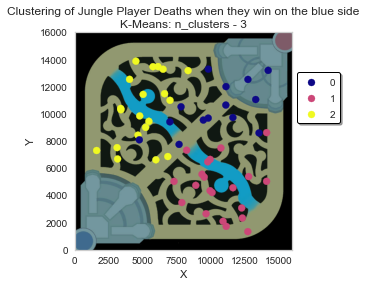

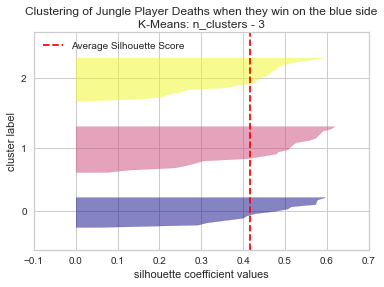

Silhouette score: 0.41760297803877133
1    21
2    20
0    14
Name: cluster, dtype: int64

Inertia: 58.78559575913168

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10298.214286,10436.285714,28.967954
1,1,10650.142857,4644.047619,12.516248
2,2,5080.250000,10311.600000,13.737599


In [70]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [71]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2674.475067,1733.574607,3.852678
1,1,1869.825871,1952.273460,4.984405
2,2,1602.550682,2446.100456,5.391577


In [72]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14238.0,4758.0,13292.0,7756.0,35.914983,22.328617
1,1,14126.0,7312.0,8624.0,1338.0,22.201950,2.943483
2,2,8346.0,1615.0,13880.0,6623.0,23.466917,2.938600


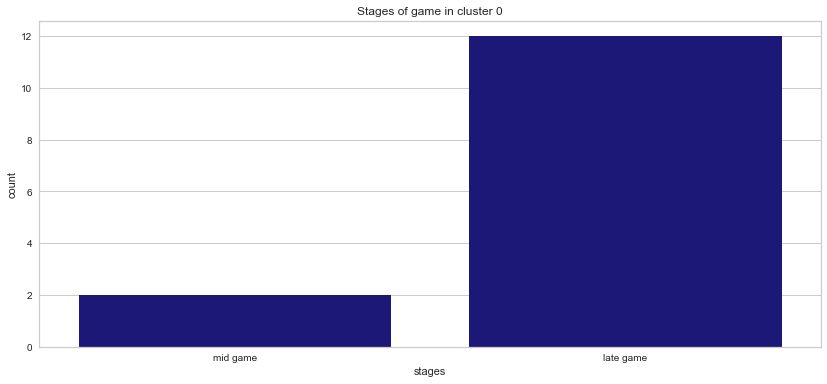

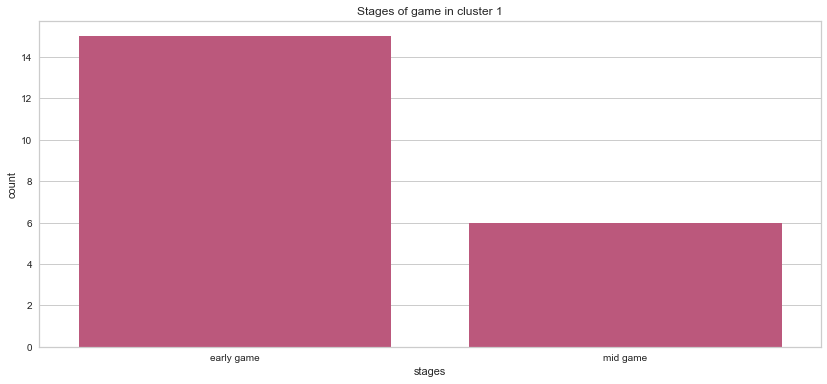

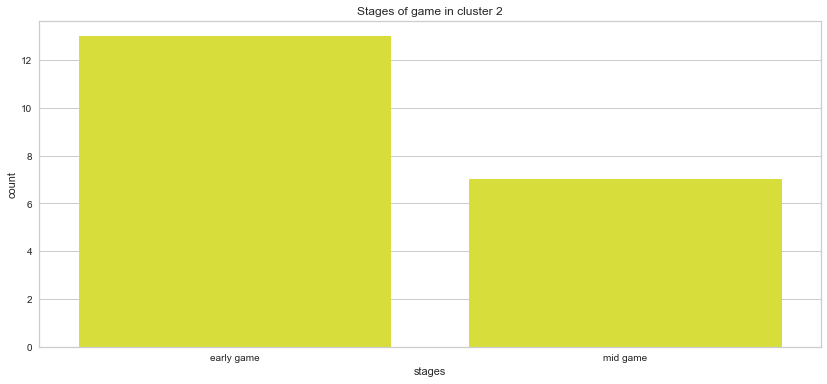

In [73]:
stagesPerCluster(blueSideVictory_df, colors)

K-Means with k = 4

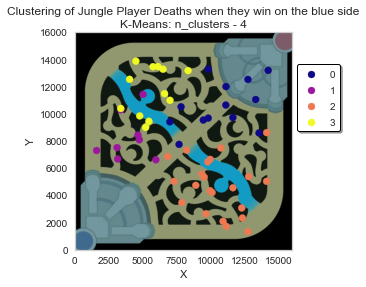

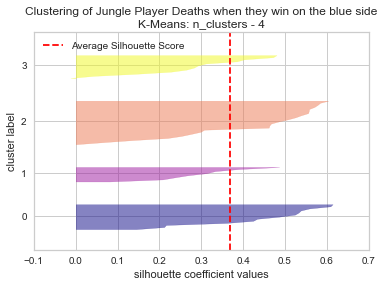

Silhouette score: 0.36855001358453193
2    22
0    13
3    12
1     8
Name: cluster, dtype: int64

Inertia: 49.79321085895051

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10724.384615,10616.615385,28.905222
1,1,3965.750000,8300.625000,19.045071
2,2,10477.500000,4744.909091,12.426561
3,3,5648.750000,11754.666667,11.802646


In [74]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [75]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2271.637618,1667.691013,3.991217
1,1,1298.981500,1618.086133,5.168095
2,2,1990.790061,1962.590447,4.887118
3,3,1323.319949,1693.488723,5.359501


In [76]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14238.0,7005.0,13292.0,7756.0,35.914983,22.328617
1,1,5976.0,1615.0,11435.0,6623.0,29.783467,12.098633
2,2,14126.0,6852.0,8624.0,1338.0,22.201950,2.943483
3,3,8346.0,3390.0,13880.0,9008.0,20.530100,2.938600


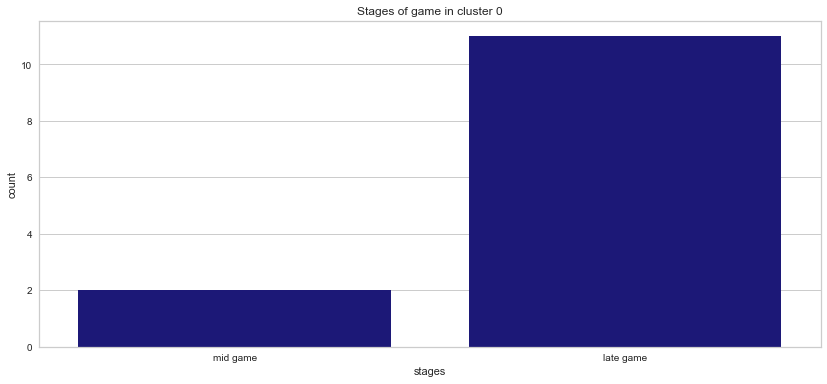

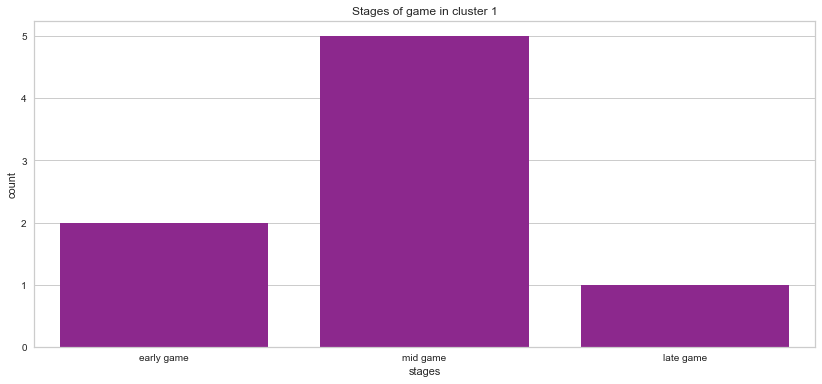

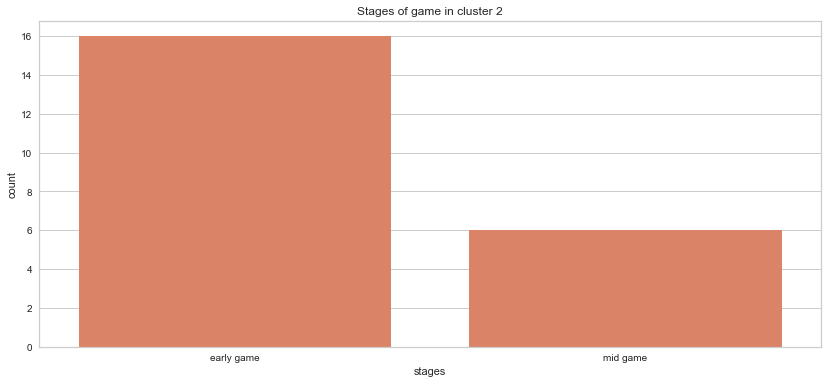

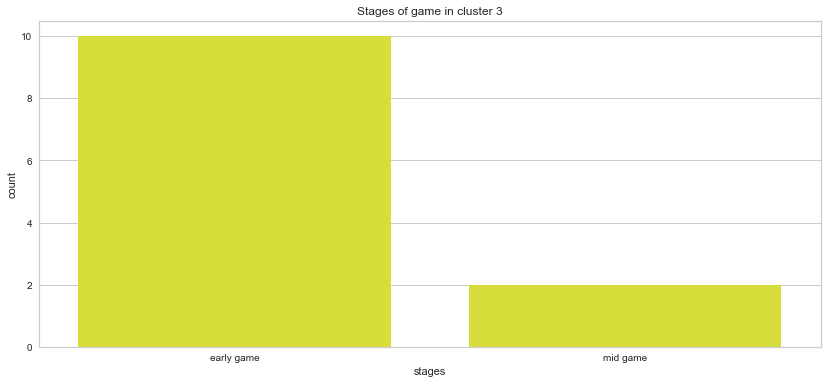

In [77]:
stagesPerCluster(blueSideVictory_df, colors)

---
##### Clustering Blue Team Defeat

In [49]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]

blueSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False) & (jungler_deaths_df["summoner"] == "anonymous 26")]
blueSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
7609,EUW1_6272529168,Blue,anonymous 26,euw1,Maokai,3.237200,12474.0,5606.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7615,EUW1_6272529168,Blue,anonymous 26,euw1,Maokai,6.955633,8715.0,989.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7628,EUW1_6272529168,Blue,anonymous 26,euw1,Maokai,12.604633,5935.0,9129.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7642,EUW1_6272529168,Blue,anonymous 26,euw1,Maokai,21.099567,5870.0,3674.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7643,EUW1_6272529168,Blue,anonymous 26,euw1,Maokai,21.932150,4154.0,3303.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248135,EUW1_6287579229,Blue,anonymous 26,euw1,MonkeyKing,14.774150,8219.0,8644.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
248141,EUW1_6287579229,Blue,anonymous 26,euw1,MonkeyKing,16.927350,6285.0,9143.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
248146,EUW1_6287579229,Blue,anonymous 26,euw1,MonkeyKing,19.274817,7684.0,5774.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
248152,EUW1_6287579229,Blue,anonymous 26,euw1,MonkeyKing,21.661117,4526.0,10098.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [50]:
print("{} played {} matches".format("Anonymous 26", len(np.unique(blueSideDefeat_df["gameId"]))))

Anonymous 26 played 18 matches


In [51]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 18 matches in which the jungler died at least once
1 players died a total of 119 times on the blue side
Defeat games on blue side contains an average of 6.611111111111111 deaths per game


In [52]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

,coordinate_x,coordinate_y,timestamp
7609,12474.0,5606.0,3.237200
7615,8715.0,989.0,6.955633
7628,5935.0,9129.0,12.604633
7642,5870.0,3674.0,21.099567
7643,4154.0,3303.0,21.932150
...,...,...,...
248135,8219.0,8644.0,14.774150
248141,6285.0,9143.0,16.927350
248146,7684.0,5774.0,19.274817
248152,4526.0,10098.0,21.661117


Normalize Data:

In [53]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(blueSideDefeat_df)
data_scaled

array([[ 1.80158146e+00, -8.77348032e-03, -1.78798630e+00],
       [ 7.10626414e-01, -1.73587913e+00, -1.28856316e+00],
       [-9.61985486e-02,  1.30909380e+00, -5.29845430e-01],
       [-1.15063161e-01, -7.31486957e-01,  6.11109886e-01],
       [-6.13088930e-01, -8.70268892e-01,  7.22934233e-01],
       [-1.01069691e+00, -5.74001256e-01,  9.80986460e-01],
       [-9.63100047e-01,  1.51408706e+00, -1.52957144e+00],
       [ 1.96120511e+00, -1.37676685e+00, -1.22761548e+00],
       [ 6.02953011e-01,  4.32635372e-01, -7.25850869e-01],
       [ 7.74475872e-01,  3.12557201e-01, -5.22666555e-01],
       [-4.35761573e-01,  9.52194526e-02, -1.42638376e-01],
       [-7.55299085e-01,  1.75271566e-01,  4.75066662e-02],
       [-1.16103336e+00, -9.88850762e-01,  1.49425644e-01],
       [-6.04962635e-01,  1.41757563e+00, -1.73285425e+00],
       [-1.08064109e+00,  7.02717737e-01, -1.41223590e+00],
       [ 2.15246325e+00, -9.27128338e-01, -1.05582168e+00],
       [ 1.23535287e+00, -2.61274307e-01

In [54]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.2888610670827832
Silhouette score for k=3: 0.3151359084723161
Silhouette score for k=4: 0.32690076146522334
Silhouette score for k=5: 0.318274770738373
Silhouette score for k=6: 0.32608014418821135
Silhouette score for k=7: 0.30929634938055167
Silhouette score for k=8: 0.30602107375093673
Silhouette score for k=9: 0.3085017630301823
Silhouette score for k=10: 0.29646499172363633
Silhouette score for k=11: 0.310054608731522
Silhouette score for k=12: 0.3247332924468624
Silhouette score for k=13: 0.2986465951013679
Silhouette score for k=14: 0.302677960523393
Silhouette score for k=15: 0.2966151725878953
Silhouette score for k=16: 0.29751779827090646
Silhouette score for k=17: 0.3023194604579795
Silhouette score for k=18: 0.29689475454058517
Silhouette score for k=19: 0.2899935574054475
Silhouette score for k=20: 0.28840980173794556
Silhouette score for k=25: 0.30854770430290157


K-Means with k = 4

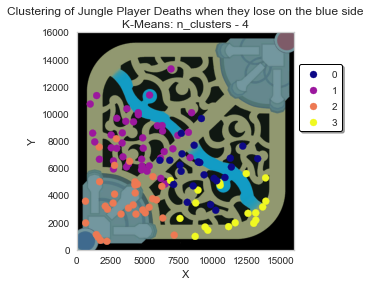

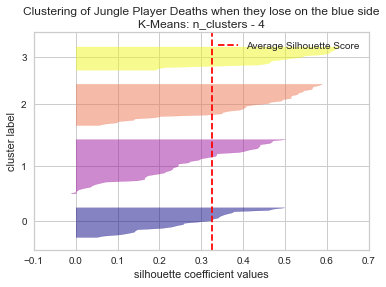

Silhouette score: 0.32690076146522334
1    43
2    33
0    24
3    19
Name: cluster, dtype: int64

Inertia: 133.3135602062566

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,9138.500000,5981.500000,21.166733
1,1,4563.069767,8033.046512,13.517367
2,2,3646.242424,3668.454545,22.742484
3,3,11044.578947,3151.000000,6.823634


In [55]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [56]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1789.016792,1557.741742,5.145254
1,1,1964.997052,1855.876035,5.757635
2,2,1709.716918,1829.586509,3.403131
3,3,2181.353571,1425.250006,3.110541


In [57]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,13313.0,6116.0,9659.0,2912.0,31.233200,12.658083
1,1,8453.0,992.0,13311.0,4843.0,26.115783,2.113200
2,2,7174.0,645.0,8173.0,625.0,28.591900,15.345183
3,3,13912.0,6902.0,5606.0,989.0,12.893233,1.566000


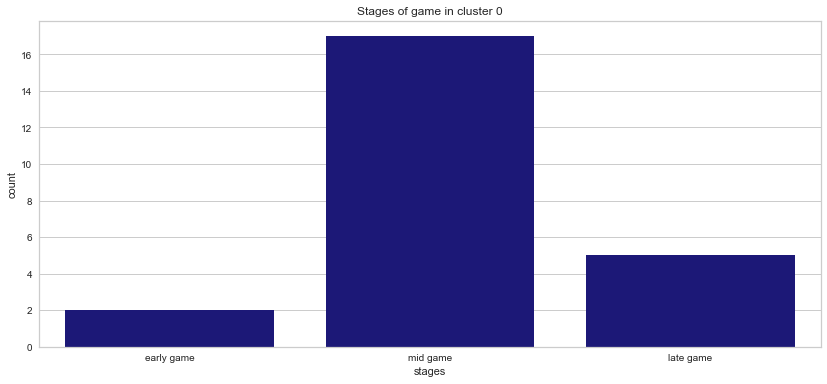

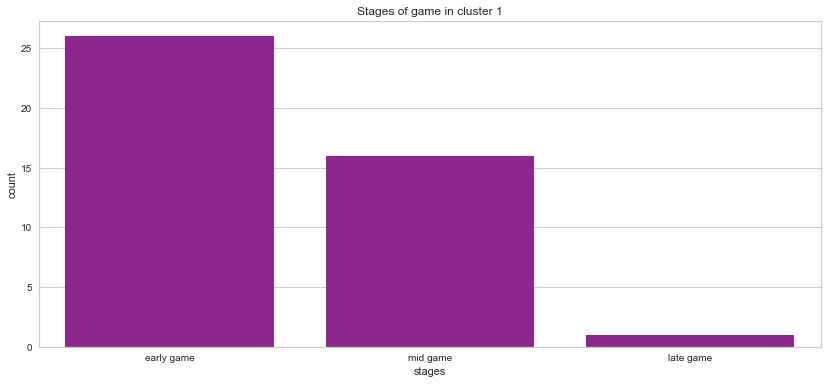

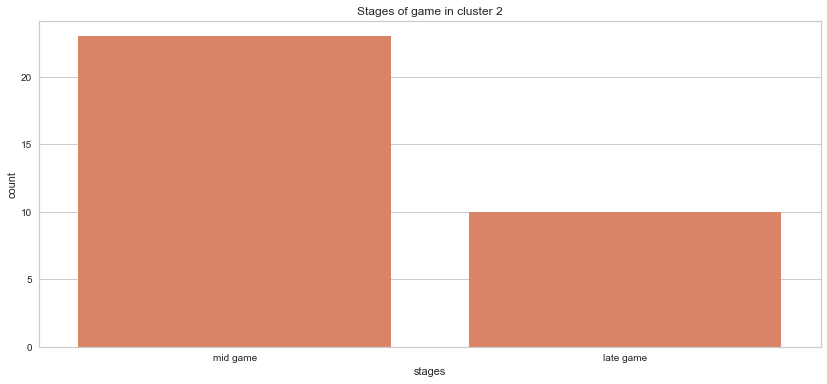

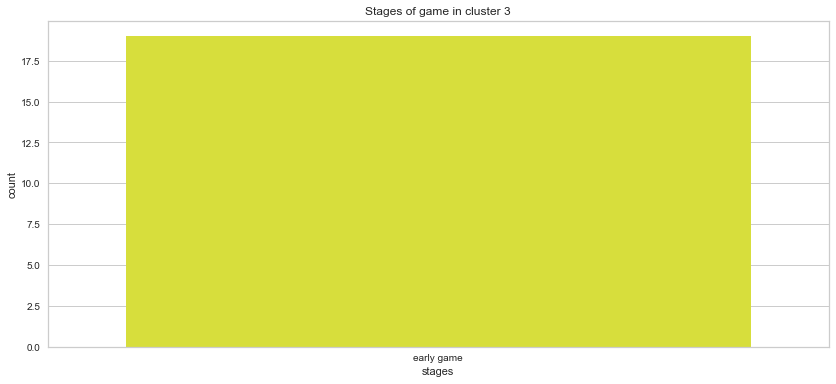

In [58]:
stagesPerCluster(blueSideDefeat_df, colors)

K-Means with k = 6

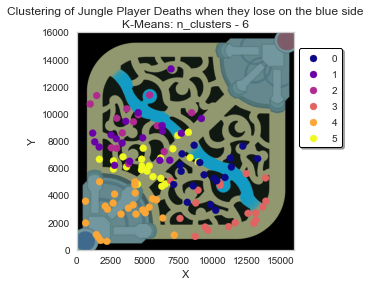

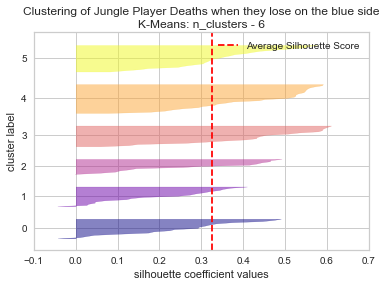

Silhouette score: 0.32608014418821135
4    26
5    24
3    19
0    18
1    18
2    14
Name: cluster, dtype: int64

Inertia: 93.39261676646817

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,9640.944444,5598.111111,20.963532
1,1,4554.000000,8426.944444,23.193018
2,2,4046.500000,9231.071429,7.600340
3,3,11044.578947,3151.000000,6.823634
4,4,3567.000000,2989.192308,22.852831
5,5,5456.666667,6276.291667,14.348085


In [59]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [60]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,1687.517324,1359.231764,4.495997
1,1,2282.893048,1609.334109,3.502641
2,2,1927.397978,1536.518675,3.766834
3,3,2181.353571,1425.250006,3.110541
4,4,1749.894832,1288.447635,3.102876
5,5,1825.312272,1025.493600,2.632114


In [61]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,13313.0,7133.0,7693.0,2912.0,30.925167,15.646600
1,1,9175.0,1172.0,13311.0,6213.0,31.233200,16.927350
2,2,8453.0,992.0,11387.0,6336.0,15.430550,2.113200
3,3,13912.0,6902.0,5606.0,989.0,12.893233,1.566000
4,4,7174.0,645.0,5013.0,625.0,28.591900,15.345183
5,5,8935.0,1668.0,8644.0,4670.0,19.467450,7.658333


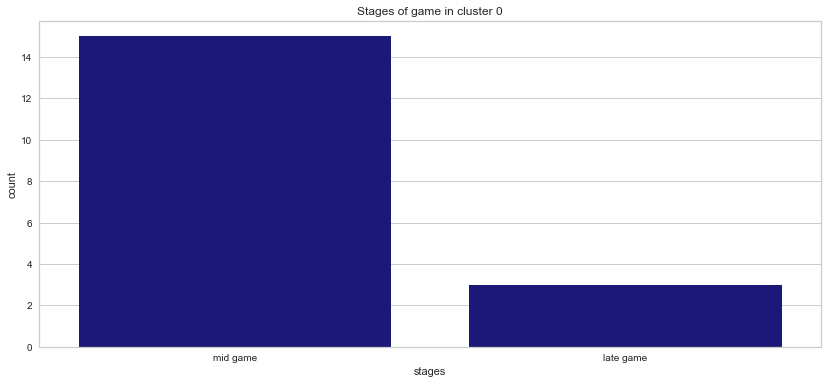

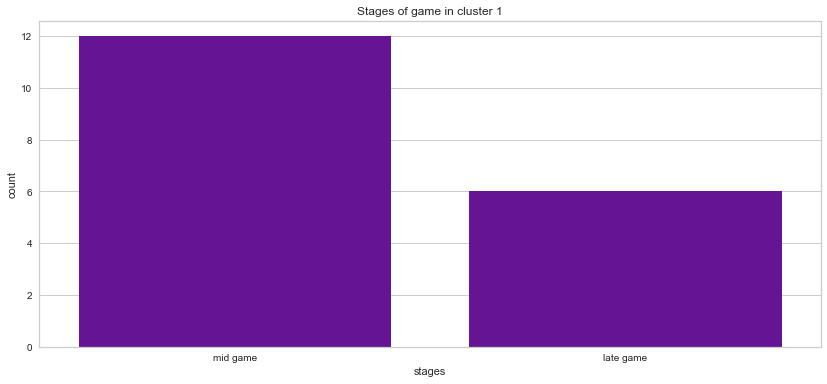

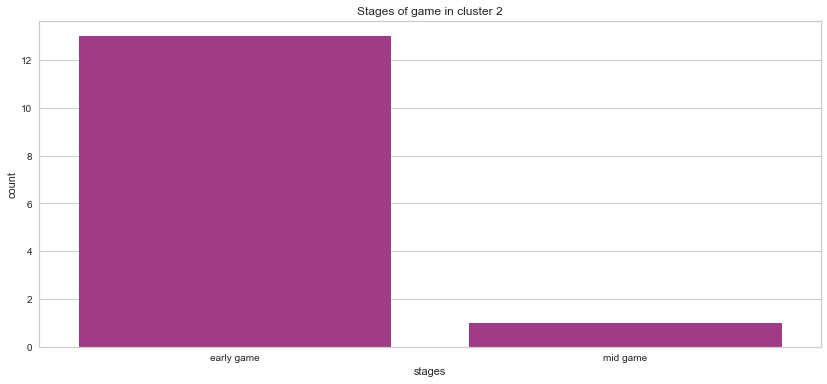

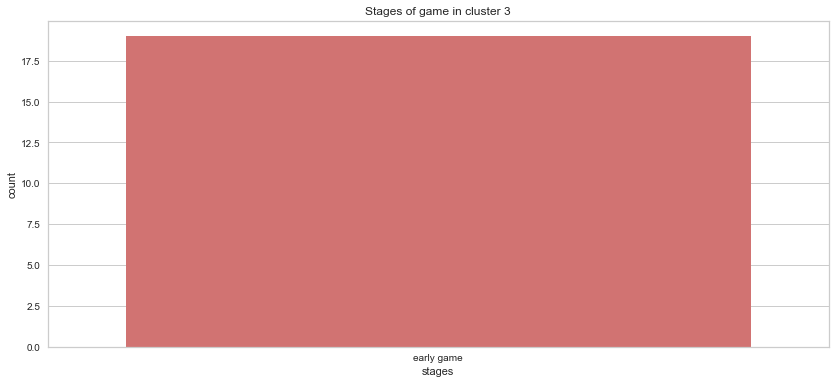

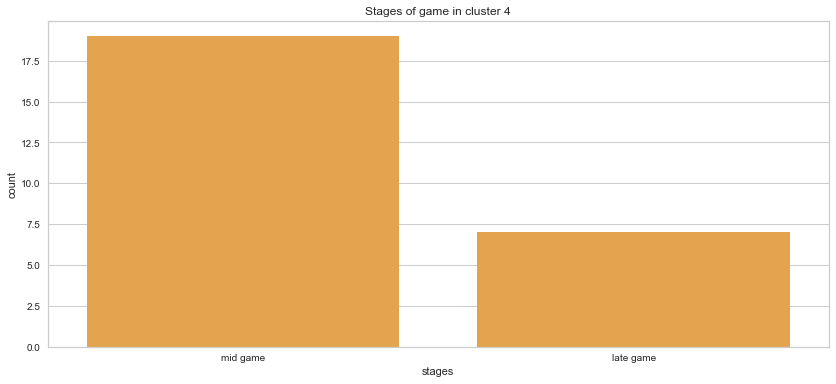

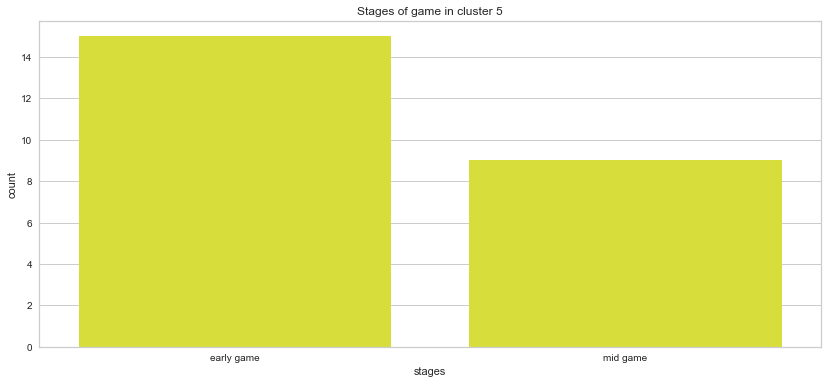

In [62]:
stagesPerCluster(blueSideDefeat_df, colors)